In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [61]:
train_data = pd.read_csv('trainTwo.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)


if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)


y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)
Shape of X after reshaping: (42000, 28, 28, 1)
Shape of y after one-hot encoding: (42000, 10)
X_train shape: (33600, 28, 28, 1)


In [51]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)), 
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(10, activation='softmax')    
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1284 - accuracy: 0.9605 - val_loss: 0.1403 - val_accuracy: 0.9587
Epoch 2/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0875 - accuracy: 0.9734 - val_loss: 0.1072 - val_accuracy: 0.9701
Epoch 3/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.1175 - val_accuracy: 0.9636
Epoch 4/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.1036 - val_accuracy: 0.9679
Epoch 5/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.1015 - val_accuracy: 0.9712
Epoch 6/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.1112 - val_accuracy: 0.9692
Epoch 7/300
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 0.1134 - val_ac

263/263 [==============================] - 0s 656us/step - loss: 0.2050 - accuracy: 0.9701
Validation Accuracy: 97.01%


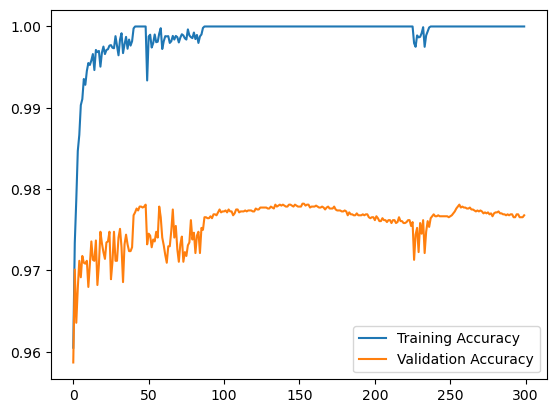

In [62]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [55]:
model.save('digitModel.keras')

875/875 [==============================] - 1s 710us/step


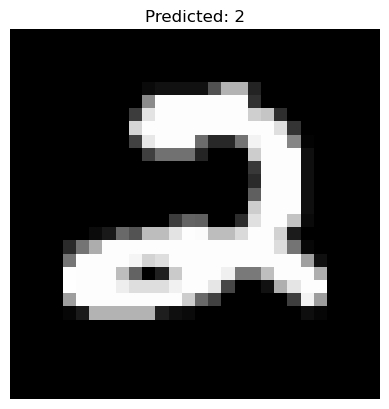

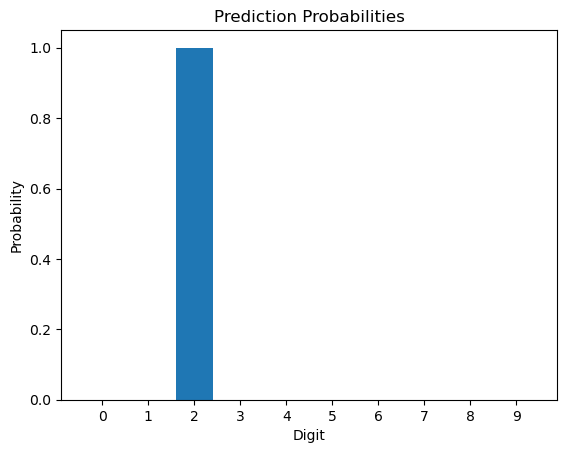

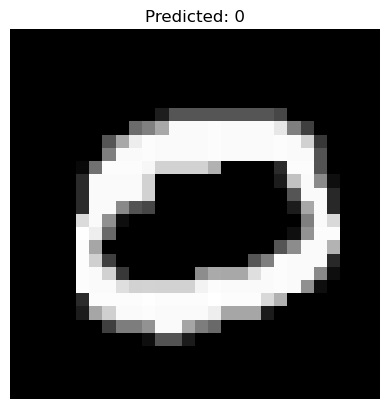

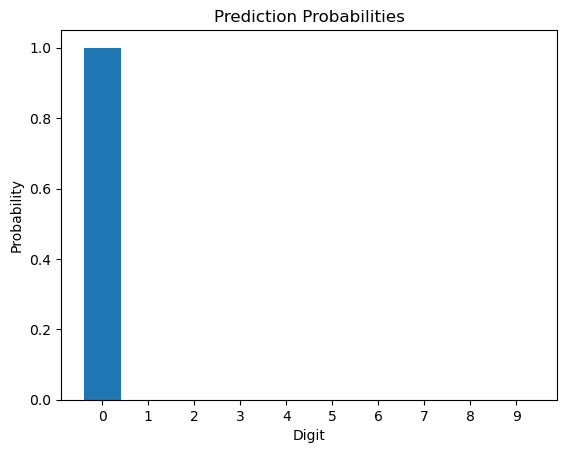

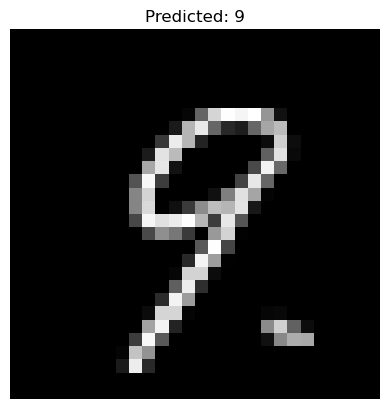

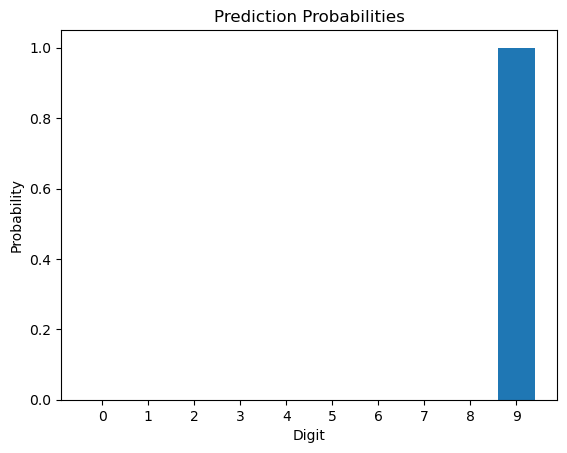

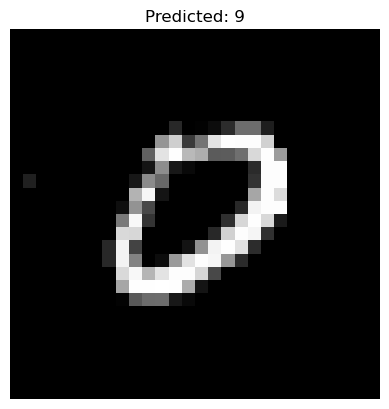

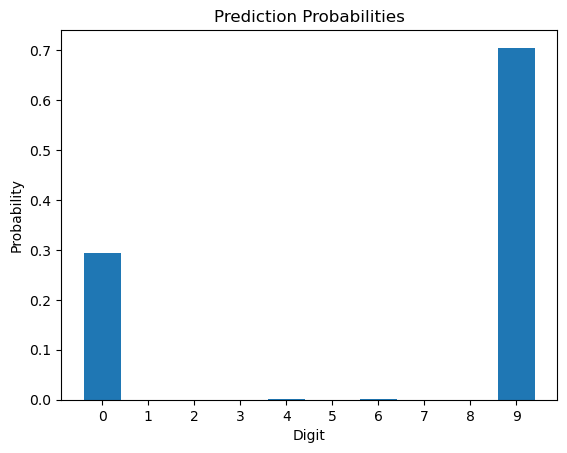

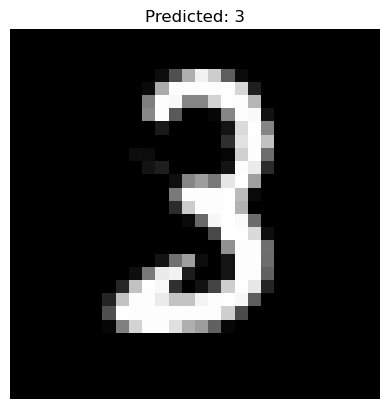

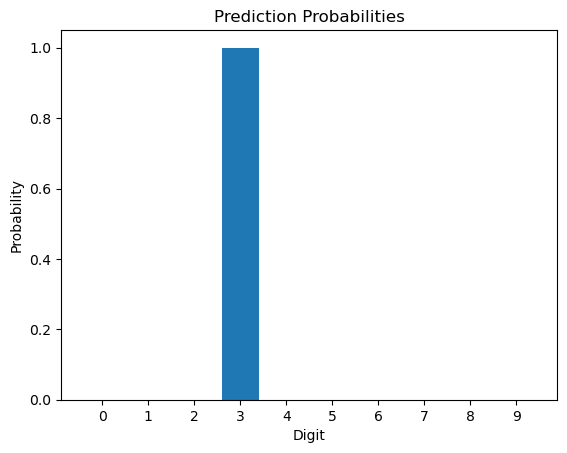

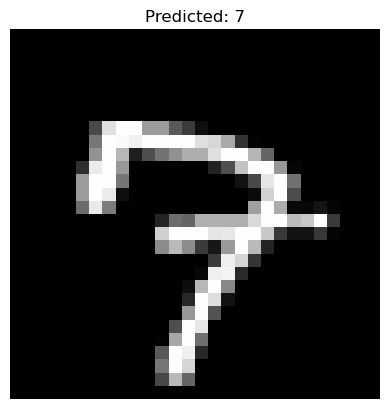

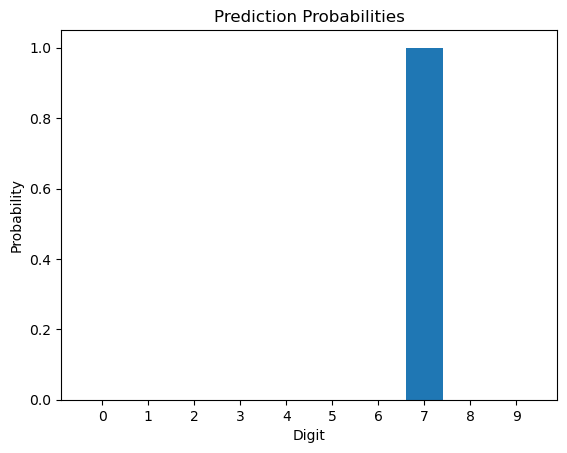

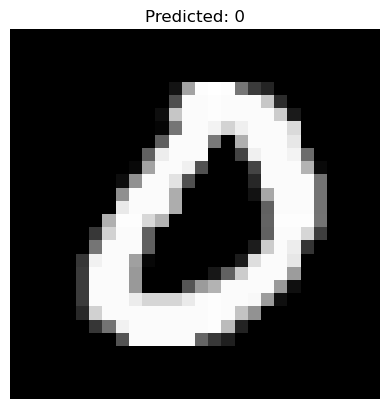

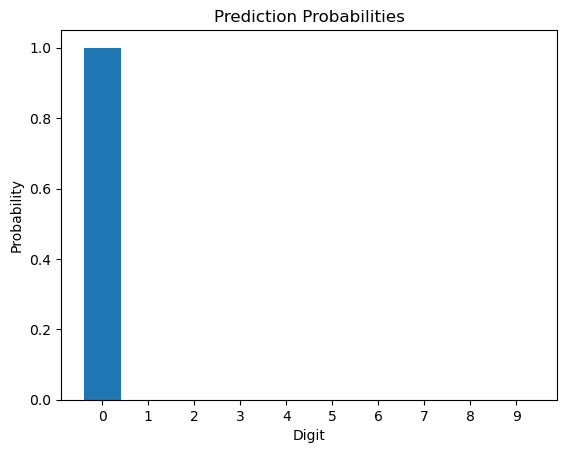

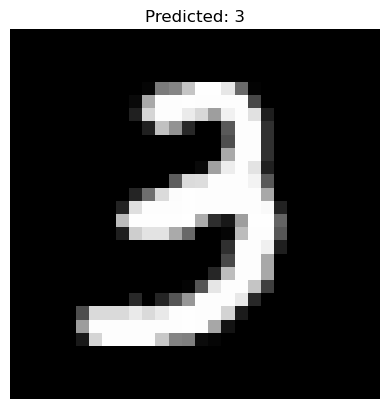

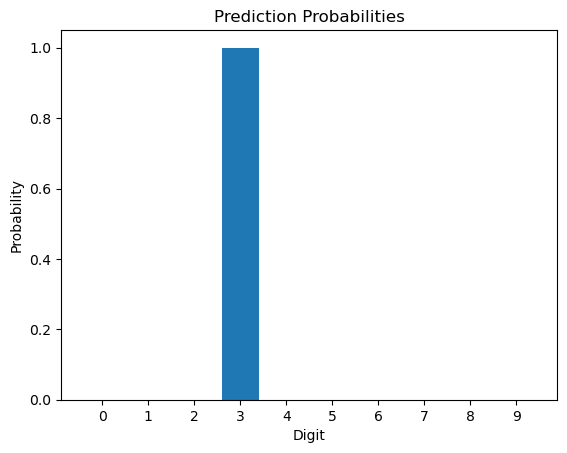

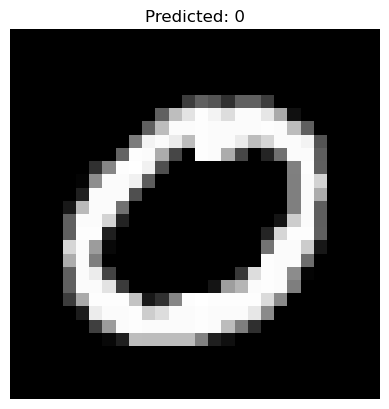

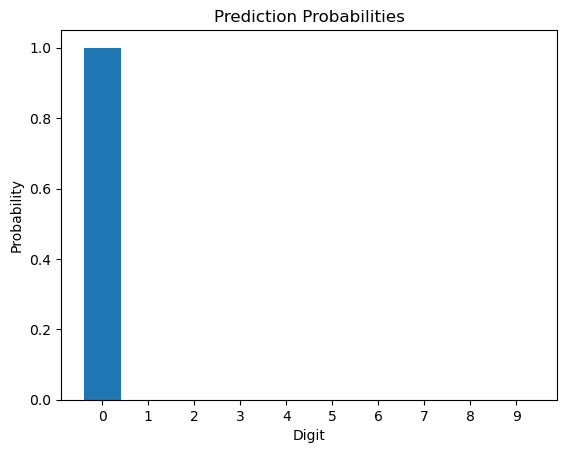

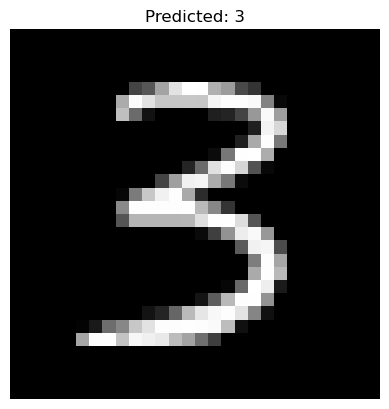

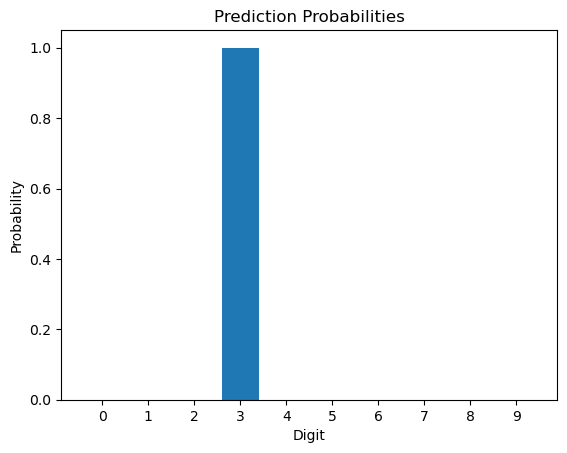

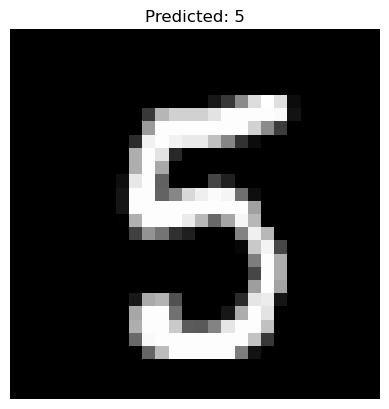

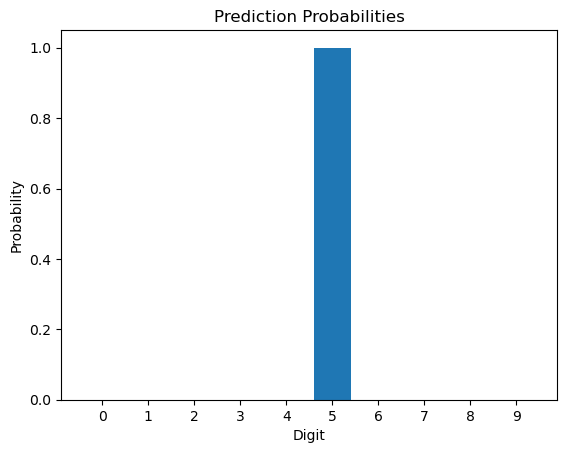

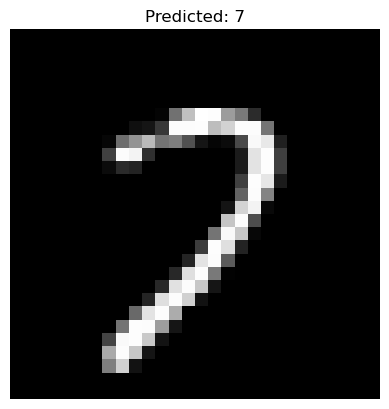

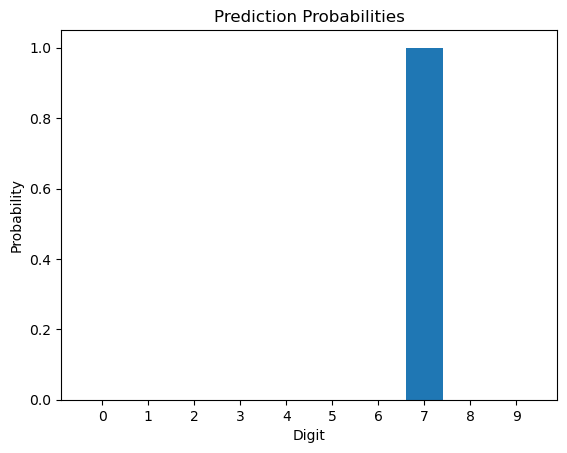

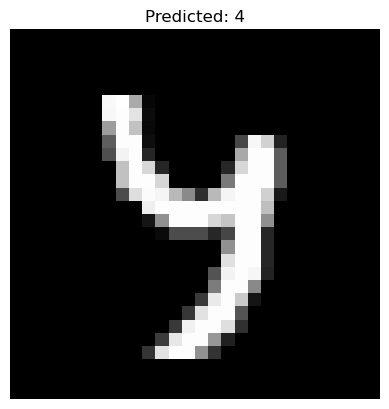

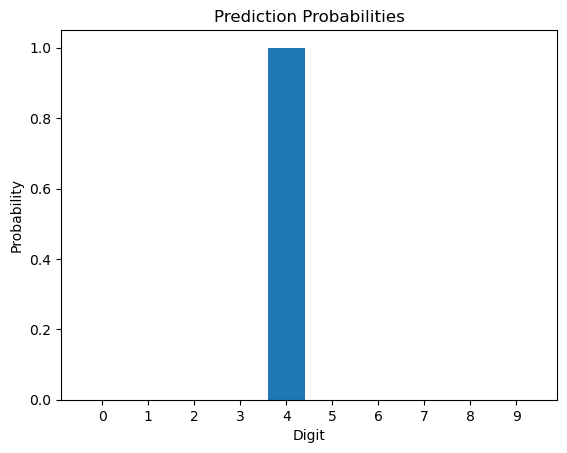

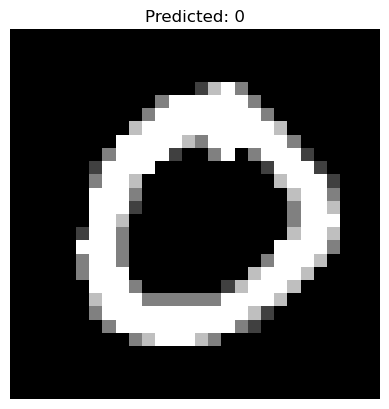

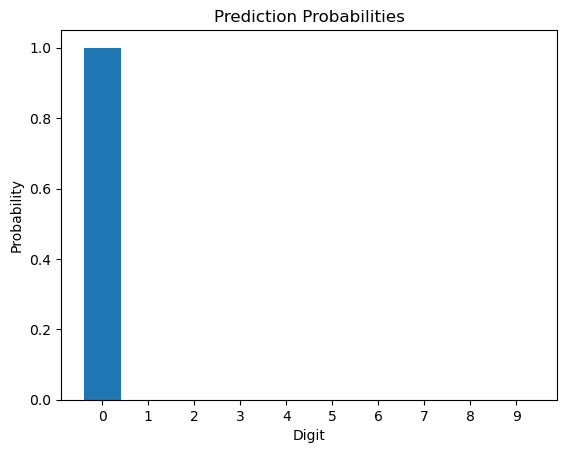

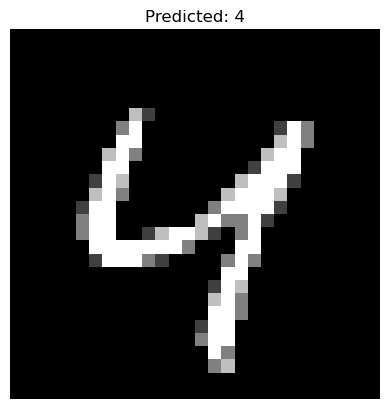

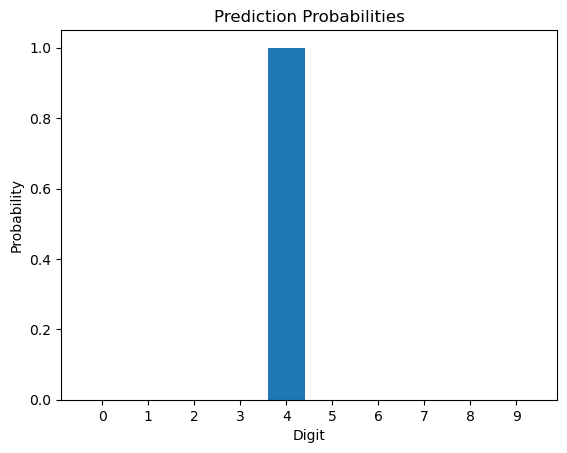

In [67]:
test_data = pd.read_csv('test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(15):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
    
    plt.bar(range(10), predictions[i])
    plt.title("Prediction Probabilities")
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.xticks(range(10))
    plt.show()

In [19]:
predictions[0].size

10

In [18]:
predicted_labels.size

8400

1/1 [==============================] - 0s 57ms/step


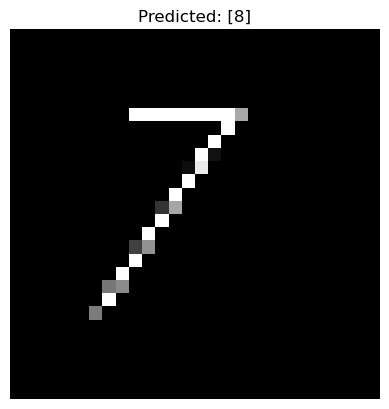

10

In [56]:
model = keras.models.load_model('digit.keras')

# Load the single test sample
test_data = pd.read_csv('digit.csv')  # Should be 1 row × 784 columns

# Convert to numeric and normalize
test_data = test_data.apply(pd.to_numeric, errors='coerce').fillna(0).values / 255.0

# Reshape to (1, 28, 28, 1)
test_data = test_data.reshape(1, 28, 28, 1)

plt.imshow(test_data.reshape(28, 28), cmap='gray')


predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

plt.title(f"Predicted: {predicted_labels}")
plt.axis('off')
plt.show()

predictions.size